In [16]:
import yfinance as yf
import pandas as pd
from collections import deque
import numpy as np
from keras.models import Sequential
from keras.layers import *
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [17]:
df = yf.download('META', period='MAX', actions=False)
df = df.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])
df = df.rename(columns={'Adj Close': 'T'})
df = df.reset_index()
df

[*********************100%%**********************]  1 of 1 completed


,Date,T
0,2012-05-18,38.230000
1,2012-05-21,34.029999
2,2012-05-22,31.000000
3,2012-05-23,32.000000
4,2012-05-24,33.029999
...,...,...
2827,2023-08-15,301.950012
2828,2023-08-16,294.290009
2829,2023-08-17,285.089996
2830,2023-08-18,283.250000


In [18]:
def day1return(t1, t2):
    return t2 - t1

In [19]:
df2 = df.copy()
df3 = df.copy()
df2 = df2.shift(1)
df2['T + 1'] = df.loc[1:, 'T']
df2 = df2.drop(0)
df2['R'] = df2.apply(lambda row: day1return(row['T'], row['T + 1']), axis=1)
df2 = df2.reset_index()
df2 = df2.drop(columns=['T', 'T + 1', 'index'])
df2

,Date,R
0,2012-05-18,-4.200001
1,2012-05-21,-3.029999
2,2012-05-22,1.000000
3,2012-05-23,1.029999
4,2012-05-24,-1.119999
...,...,...
2826,2023-08-14,-4.239990
2827,2023-08-15,-7.660004
2828,2023-08-16,-9.200012
2829,2023-08-17,-1.839996


In [20]:
n = 10
indexes = [i for i in range(n)]
df = df2
df2 = df2.drop(indexes)
df2

,Date,R
10,2012-06-04,-1.029999
11,2012-06-05,0.939999
12,2012-06-06,-0.500000
13,2012-06-07,0.790001
14,2012-06-08,-0.090000
...,...,...
2826,2023-08-14,-4.239990
2827,2023-08-15,-7.660004
2828,2023-08-16,-9.200012
2829,2023-08-17,-1.839996


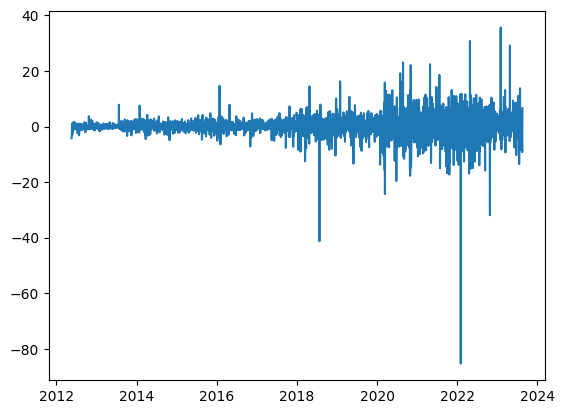

In [21]:
plt.plot(df['Date'], df['R'])

In [22]:
column = deque(df2.loc[:,'R'])
for i in range(n):
    column.pop()
    column.appendleft(df.loc[n - i - 1, 'R'])
    df2[f'R - {i + 1}'] = column
df2

,Date,R,R - 1,R - 2,R - 3,R - 4,R - 5,R - 6,R - 7,R - 8,R - 9,R - 10
10,2012-06-04,-1.029999,-0.820000,-1.880001,1.410000,-0.650000,-3.070000,-1.119999,1.029999,1.000000,-3.029999,-4.200001
11,2012-06-05,0.939999,-1.029999,-0.820000,-1.880001,1.410000,-0.650000,-3.070000,-1.119999,1.029999,1.000000,-3.029999
12,2012-06-06,-0.500000,0.939999,-1.029999,-0.820000,-1.880001,1.410000,-0.650000,-3.070000,-1.119999,1.029999,1.000000
13,2012-06-07,0.790001,-0.500000,0.939999,-1.029999,-0.820000,-1.880001,1.410000,-0.650000,-3.070000,-1.119999,1.029999
14,2012-06-08,-0.090000,0.790001,-0.500000,0.939999,-1.029999,-0.820000,-1.880001,1.410000,-0.650000,-3.070000,-1.119999
...,...,...,...,...,...,...,...,...,...,...,...,...
2826,2023-08-14,-4.239990,4.549988,-4.099976,0.529999,-7.430023,-3.919983,5.829987,-2.459991,-1.119995,-8.399994,4.109985
2827,2023-08-15,-7.660004,-4.239990,4.549988,-4.099976,0.529999,-7.430023,-3.919983,5.829987,-2.459991,-1.119995,-8.399994
2828,2023-08-16,-9.200012,-7.660004,-4.239990,4.549988,-4.099976,0.529999,-7.430023,-3.919983,5.829987,-2.459991,-1.119995
2829,2023-08-17,-1.839996,-9.200012,-7.660004,-4.239990,4.549988,-4.099976,0.529999,-7.430023,-3.919983,5.829987,-2.459991


In [23]:
df_as_np = df2.to_numpy()
time, y, x = np.split(df_as_np, [1, 2], axis=1)
x = np.array(x)
y = np.array(y)
x = np.reshape(x, (x.shape[0], x.shape[1], 1))
time.shape, x.shape, y.shape

((2821, 1), (2821, 10, 1), (2821, 1))

In [24]:
p_80 = int(.8 * x.shape[0])
x = x.astype(np.float32)
y = y.astype(np.float32)
x_train, y_train, date_train = x[:p_80], y[:p_80], time[:p_80]
x_test, y_test, date_test = x[p_80:], y[p_80:], time[p_80:]

In [25]:
lstm = Sequential([
    Input((10, 1)),
    LSTM(50, return_sequences=True),
    Dropout(0.1),
    LSTM(50, return_sequences=True),
    Dropout(0.1),
    LSTM(50),
    Dense(1, activation='linear')
])
lstm.compile(optimizer='adam', loss='mse')
lstm.fit(x_train, y_train, epochs=100, shuffle=True, batch_size=10)

Epoch 1/100
226/226 [==============================] - 3s 5ms/step - loss: 10.3371
Epoch 2/100
226/226 [==============================] - 1s 5ms/step - loss: 10.3109
Epoch 3/100
226/226 [==============================] - 1s 5ms/step - loss: 10.3111
Epoch 4/100
226/226 [==============================] - 1s 5ms/step - loss: 10.3013
Epoch 5/100
226/226 [==============================] - 1s 5ms/step - loss: 10.3119
Epoch 6/100
226/226 [==============================] - 1s 5ms/step - loss: 10.2837
Epoch 7/100
226/226 [==============================] - 1s 5ms/step - loss: 10.2783
Epoch 8/100
226/226 [==============================] - 1s 5ms/step - loss: 10.2834
Epoch 9/100
226/226 [==============================] - 1s 5ms/step - loss: 10.2692
Epoch 10/100
226/226 [==============================] - 1s 5ms/step - loss: 10.2747
Epoch 11/100
226/226 [==============================] - 1s 5ms/step - loss: 10.2604
Epoch 12/100
226/226 [==============================] - 1s 5ms/step - loss: 10.2472
E

18/18 [==============================] - 0s 2ms/step


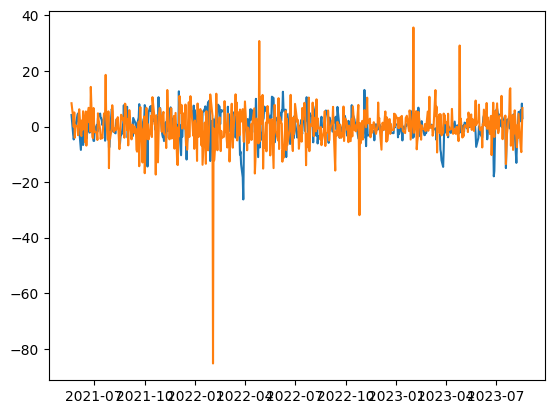

In [26]:
pred = lstm.predict(x_test)
plt.plot(date_test, pred)
plt.plot(date_test, y_test)

In [27]:
future = 30
newpreds = []
pred_fut = pred
newpred = pred_fut[-1]
time_fut = date_test
x_fut_test = x_test[-1]
day = datetime.today()
day = day.replace(hour=0, minute=0, second=0, microsecond=0)
for i in range(future):
    x_fut_test = np.append(x_fut_test, newpred)
    x_fut_test = np.delete(x_fut_test, 0)
    x_fut_test = np.reshape(x_fut_test, (1, x.shape[1], 1))
    newpred = lstm.predict(x_fut_test)
    newpreds.append(newpred)
    pred_fut = np.append(pred_fut, newpred)
    day = day + timedelta(days = 1)
    time_fut = np.append(time_fut, pd.Timestamp(day))

1/1 [==============================] - 0s 8ms/step


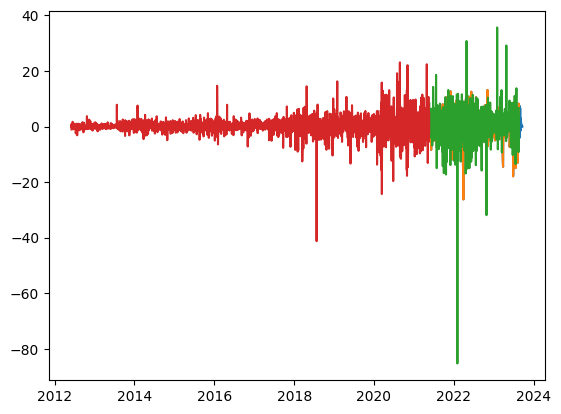

In [28]:
newpreds = np.array(newpreds)
newpreds = np.reshape(newpreds, (len(newpreds), 1))
plt.plot(time_fut, pred_fut)
plt.plot(date_test, pred)
plt.plot(date_test, y_test)
plt.plot(date_train, y_train)

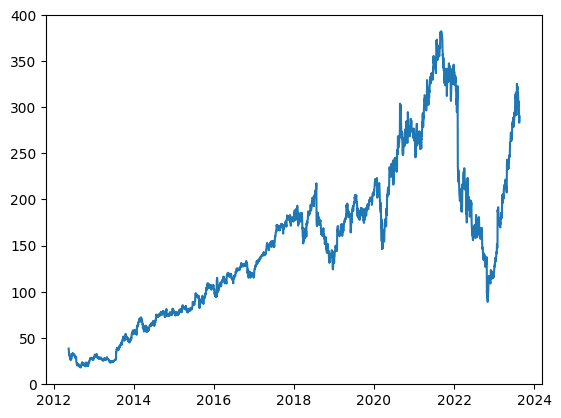

In [29]:
time2 = df3['Date']
value = df3['T']
plt.plot(time2, value)

In [53]:
index = p_80
df4 = df3.copy()
for i in range(len(df4) - index - 11):
    a = df3.loc[index + i, ['T']]
    b = float(pred[i])
    a = a.iloc[0]
    df4.loc[index + i + 1, ['T']] = a + b

/var/folders/00/mlj1t7mx7y90l4pd2q_0lyy80000gn/T/ipykernel_52186/3335774066.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b = float(pred[i])
/var/folders/00/mlj1t7mx7y90l4pd2q_0lyy80000gn/T/ipykernel_52186/3335774066.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b = float(pred[i])
/var/folders/00/mlj1t7mx7y90l4pd2q_0lyy80000gn/T/ipykernel_52186/3335774066.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b = float(pred[i])
/var/folders/00/mlj1t7mx7y90

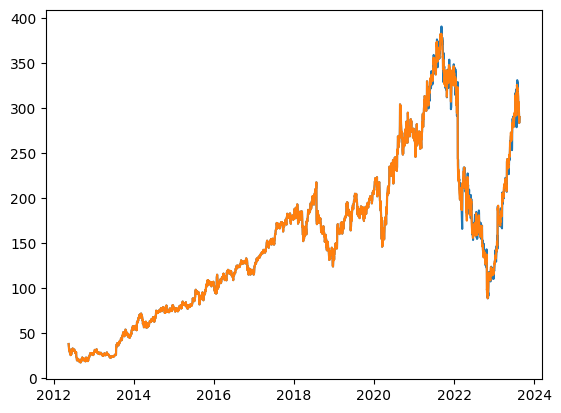

In [54]:
plt.plot(df4['Date'], df4['T'])
plt.plot(df3['Date'], df3['T'])

In [55]:
df4

,Date,T
0,2012-05-18,38.230000
1,2012-05-21,34.029999
2,2012-05-22,31.000000
3,2012-05-23,32.000000
4,2012-05-24,33.029999
...,...,...
2827,2023-08-15,301.950012
2828,2023-08-16,294.290009
2829,2023-08-17,285.089996
2830,2023-08-18,283.250000


In [56]:
day = datetime.today().replace(hour=0, minute=0, second=0, microsecond=0)
today = day
graph_x = [day]
graph_y = [df4.loc[len(df4) - 1, ['T']].iloc[0]]
for i in range(future):
    y = graph_y[-1]
    day = day + timedelta(days=1)
    while day.weekday() > 4:
        day = day + timedelta(days=1)
    graph_x.append(day)
    graph_y.append(y + float(newpreds[i]))
graph_x, graph_y

/var/folders/00/mlj1t7mx7y90l4pd2q_0lyy80000gn/T/ipykernel_52186/2009710751.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  graph_y.append(y + float(newpreds[i]))


([datetime.datetime(2023, 8, 21, 0, 0),
  datetime.datetime(2023, 8, 22, 0, 0),
  datetime.datetime(2023, 8, 23, 0, 0),
  datetime.datetime(2023, 8, 24, 0, 0),
  datetime.datetime(2023, 8, 25, 0, 0),
  datetime.datetime(2023, 8, 28, 0, 0),
  datetime.datetime(2023, 8, 29, 0, 0),
  datetime.datetime(2023, 8, 30, 0, 0),
  datetime.datetime(2023, 8, 31, 0, 0),
  datetime.datetime(2023, 9, 1, 0, 0),
  datetime.datetime(2023, 9, 4, 0, 0),
  datetime.datetime(2023, 9, 5, 0, 0),
  datetime.datetime(2023, 9, 6, 0, 0),
  datetime.datetime(2023, 9, 7, 0, 0),
  datetime.datetime(2023, 9, 8, 0, 0),
  datetime.datetime(2023, 9, 11, 0, 0),
  datetime.datetime(2023, 9, 12, 0, 0),
  datetime.datetime(2023, 9, 13, 0, 0),
  datetime.datetime(2023, 9, 14, 0, 0),
  datetime.datetime(2023, 9, 15, 0, 0),
  datetime.datetime(2023, 9, 18, 0, 0),
  datetime.datetime(2023, 9, 19, 0, 0),
  datetime.datetime(2023, 9, 20, 0, 0),
  datetime.datetime(2023, 9, 21, 0, 0),
  datetime.datetime(2023, 9, 22, 0, 0),
  date

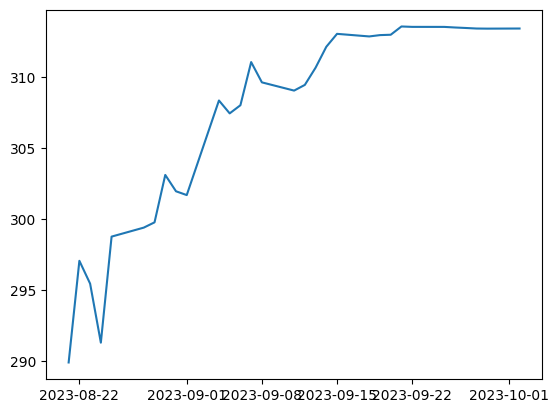

In [57]:
plt.plot(graph_x, graph_y)

In [36]:
newpreds

array([[ 1.58757985e+00],
       [ 1.35078597e+00],
       [ 3.79162645e+00],
       [ 2.14756346e+00],
       [ 5.00055361e+00],
       [ 1.06630869e+01],
       [-4.07021427e+00],
       [ 3.49953830e-01],
       [ 3.04283786e+00],
       [-2.56947136e+00],
       [ 2.92728138e+00],
       [ 1.02069902e+00],
       [-3.62389421e+00],
       [ 2.22406477e-01],
       [ 8.09574962e-01],
       [ 5.29949665e+00],
       [-6.07948422e-01],
       [ 6.58158541e-01],
       [-3.99749756e-01],
       [-9.01297927e-02],
       [ 4.31152582e-01],
       [-6.59821391e-01],
       [ 5.60904408e+00],
       [ 8.60901549e-03],
       [ 4.04676259e-01],
       [-3.67697515e-02],
       [ 1.01008154e-01],
       [-3.94727476e-02],
       [-4.97719124e-02],
       [ 1.05211087e-01]], dtype=float32)